<div style="color: #ffffff; background-color: #2979ff; border-bottom: 1px solid #004ecb; padding: 2em;">
<b style="font-size: 20pt;">REINFORCEMENT LEARNING PROJECT</b> <br> <br>
<b style="font-size: 15pt; color: #bbdefb">Wind farm optimization</b>
    
**November 2022**

**Safia Echarif, Zineb Et-tarraf, Wassim Marzouqui, Zoubair Antifi, Andy Zhang** 
</div>

<br>
<div style="color: #ffffff; background-color: #2979ff; border-bottom: 5px solid #004ecb; padding: 2em;"> 
<h1>II. Scientific work</h1>
 Second part: RL algorithms
</div>

<div style="background-color: #e1f5fe; border-left: 5px solid #2962ff; padding: 0.5em;"> 
<b style="color: #2962ff;">Question:</b>  
    <ul>
        <li> The code proposes a random heuristic. Evaluate its performance numerically and compare it
with a heuristic that consists in tracking the wind’s orientation as perfectly as possible.</li>
    </ul>
</div>

To evaluate its performance numerically, we are going to compute the average power output over a large number of days (30 days).

To compare it with a heuristic, we have added the heuristic agent in $simu.py$. This agent follows the wind orientation as perfectly as possible. Then, we compute the average power output over multiple days, just as for the random heuristic and we compare the two results.

In [1]:
# Most of the code is taken from the example demo.py

from wind_turbine import Wind_turbine, Wind
from simu import Random_agent, Basic_agent, Simu
from simu import Heuristic_agent #New agent added in the code
import matplotlib.pyplot as plt
import numpy as np


nb_day = 30 # We repeat the experiment many times to have a more reliable value of average power output for the two agent
average_power_output_random = []
average_power_output_heur = []

for i in range(nb_day):
    wd = Wind(10, np.random.randint(0,359), 60, 'OU')
    wt = Wind_turbine(np.random.randint(0,359), True)

    # Initialize an agent instance that will give the policy
    random_heuristic = Random_agent()
    heuristic = Heuristic_agent()
    
    # Set up a simulation that runs for 1 day
    random_heur_sm = Simu(random_heuristic, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))
    heur_sm = Simu(heuristic, wd, wt, int(np.ceil(24*3600 / wd.step_duration))) # we do the simulation with the same parameters but
    # with a different agent that tracks the wind's orientation as perfectly as possible
    
    # Run the simulations
    random_heur_sm.run_simu()
    heur_sm.run_simu()

    # Get the logs from the simulation (random heuristic)
    power_output_random = random_heur_sm.power_output_log 			    # Power output from the wind turbine in MW
    actions_random = random_heur_sm.action_log 						    # Actions taken by the agent
    rel_wind_random = random_heur_sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
    true_rel_wind_random = random_heur_sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
    wd_heading_random = random_heur_sm.wd_heading_log

    # Get the logs from the simulation (heuristic)
    power_output_heur = heur_sm.power_output_log 			# Power output from the wind turbine in MW
    actions_heur = heur_sm.action_log 						# Actions taken by the agent
    rel_wind_heur = heur_sm.rel_wind_heading_log 			# Estimated direction of the wind in the wind turbine frame
    true_rel_wind_heur = heur_sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
    wd_heading_heur = heur_sm.wd_heading_log

    average_power_output_random_day = np.mean(power_output_random)
    average_power_output_heur_day = np.mean(power_output_heur)

    average_power_output_random.append(average_power_output_random_day)
    average_power_output_heur.append(average_power_output_heur_day)

average_power_output_random_mean = np.mean(average_power_output_random)
average_power_output_heur_mean = np.mean(average_power_output_heur)
print("Average energy produced with a random heuristic over", nb_day, "days :", average_power_output_random_mean)
print("Average energy produced with a heuristic over", nb_day, "days :", average_power_output_heur_mean)

Average energy produced with a random heuristic over 30 days : 0.09142965944523927
Average energy produced with a heuristic over 30 days : 0.5183371114940128


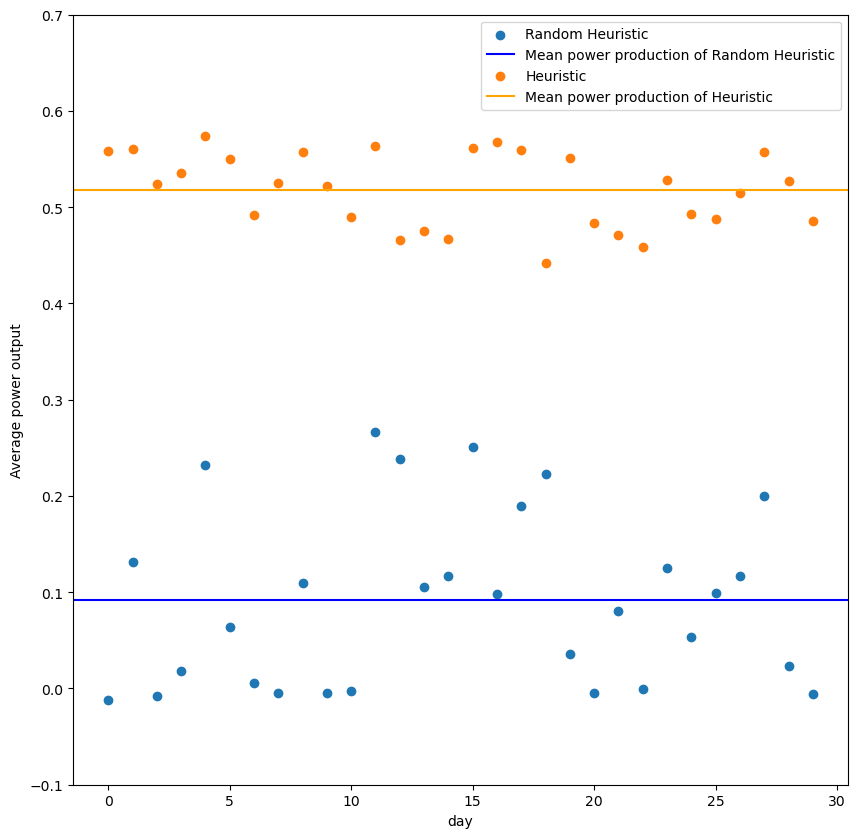

In [2]:
days = np.arange(0, nb_day)
plt.figure(figsize=(10, 10))
plt.scatter(days, average_power_output_random, label="Random Heuristic")
plt.axhline(y = average_power_output_random_mean, color = 'blue', \
            linestyle = '-', label = "Mean power production of Random Heuristic")
plt.scatter(days, average_power_output_heur, label="Heuristic")
plt.axhline(y = average_power_output_heur_mean, color = 'orange', \
            linestyle = '-', label = "Mean power production of Heuristic") # Mean power production over all the days
plt.ylabel("Average power output")
plt.xlabel("day")
plt.ylim(-0.1, 0.7)
plt.legend()
plt.show()

As we can see from this plot :
- The mean power output is higher for the heuristic than for the random heuristic.
- The production everyday is more "stable" for the heuristic, since its mean power output over the a day is around and closer to the mean production over the month, where the random heuristic is less stable since it has some days where the production is really low compared to the mean production over the month.

We can see that the average energy produced is way higher for the heuristic, compared to the random heuristic.

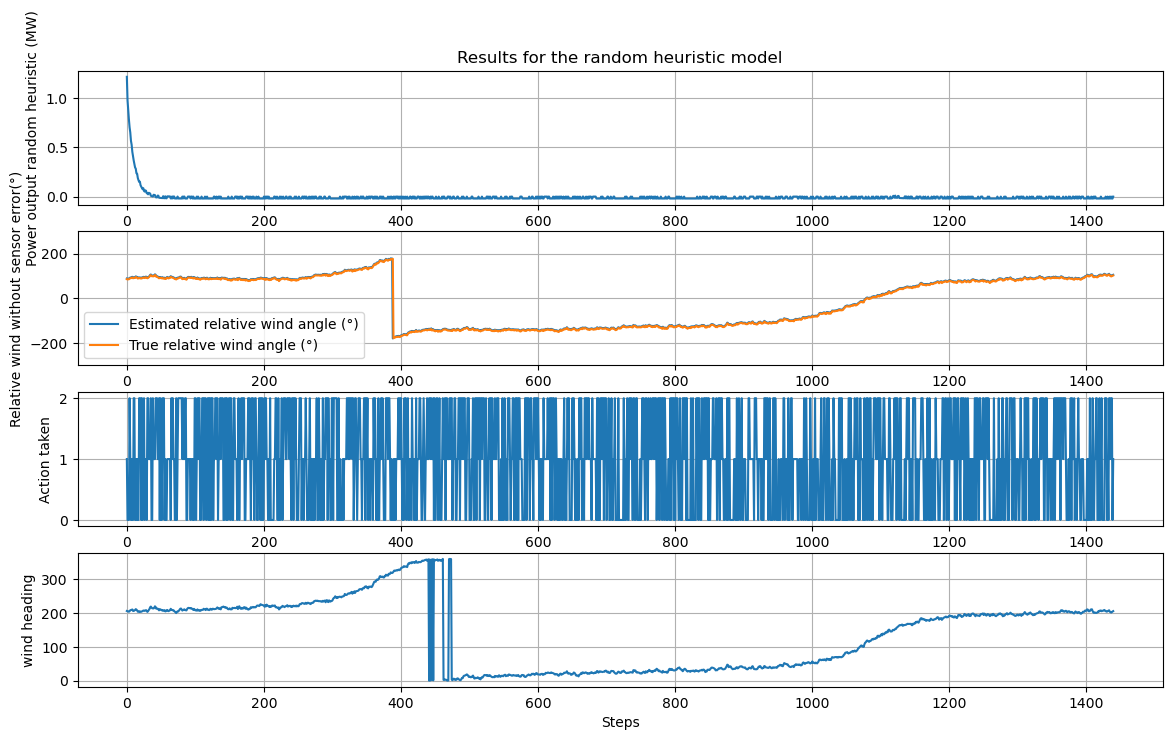

In [3]:
# Plot the result for the last day (for the random heuristic agent)
ax1 = plt.subplot(411)
ax1.set_title("Results for the random heuristic model")
ax1.plot(power_output_random)
ax1.grid()
ax1.set_ylabel('Power output random heuristic (MW)')

ax2 = plt.subplot(412, sharex=ax1)
ax2.plot(rel_wind_random, label='Estimated relative wind angle (°)')
ax2.plot(true_rel_wind_random, label='True relative wind angle (°)')
ax2.grid()
ax2.set_ylabel('Relative wind without sensor error(°)')
ax2.set_ylim((-300, 300))
ax2.legend()

ax3 = plt.subplot(413, sharex=ax1)
ax3.plot(actions_random)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('Action taken')

ax3 = plt.subplot(414, sharex=ax1)
ax3.plot(wd_heading_random)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('wind heading')

# Resize
fig = plt.gcf()
fig.set_size_inches(14, 8)

plt.show()

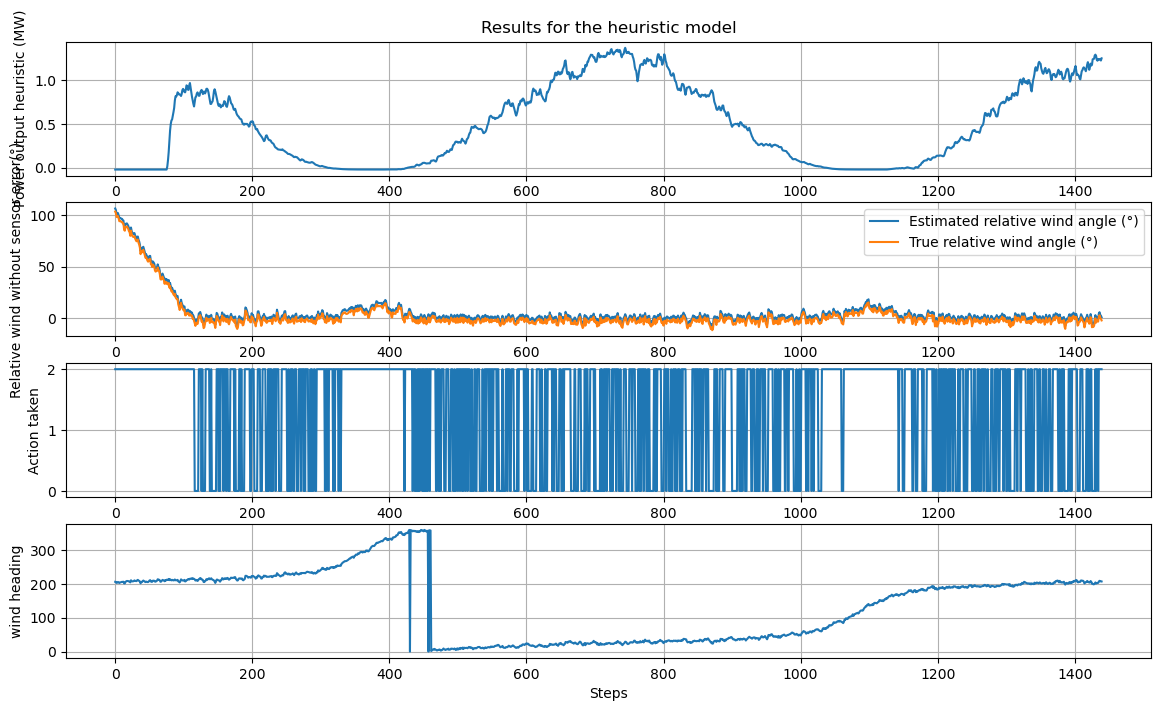

In [4]:
# Plot the result for the last (for the heuristic agent)
ax1 = plt.subplot(411)
ax1.set_title("Results for the heuristic model")
ax1.plot(power_output_heur)
ax1.grid()
ax1.set_ylabel('Power output heuristic (MW)')

ax2 = plt.subplot(412, sharex=ax1)
ax2.plot(rel_wind_heur, label='Estimated relative wind angle (°)')
ax2.plot(true_rel_wind_heur, label='True relative wind angle (°)')
ax2.grid()
ax2.set_ylabel('Relative wind without sensor error(°)')
ax2.legend()

ax3 = plt.subplot(413, sharex=ax1)
ax3.plot(actions_heur)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('Action taken')

ax3 = plt.subplot(414, sharex=ax1)
ax3.plot(wd_heading_heur)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('wind heading')

# Resize
fig = plt.gcf()
fig.set_size_inches(14, 8)

plt.show()

<div style="background-color: #e1f5fe; border-left: 5px solid #2962ff; padding: 0.5em;"> 
<b style="color: #2962ff;">Question:</b>  
    <ul>
        <li> Implement an agent that uses a tabular Q-learning algorithm and study its performance and its
learning speed (Hint: choose wisely your state representation, and explain your choices).
  </li>
    </ul>
</div>

- The <u>state space</u> $S = \left\{(\theta, Wind\_speed), \theta \in [\![ 0, 35 ]\!], Wind\_speed \in [\![ 0, 4 ]\!] \right\}$ with $36 \times 5$ possible states.

We use only 36 values for $\theta$ in order to reduce the number of possible state and thus reducing the size of the Q-table in order to make the exploration easier. We do the same for $Wind\_speed$.

We will assume that the wind can only have a speed between $0m.s^{-1}$ and $20m.s^{-1}$

We have then : $$\theta = real\_value\_of\_theta \text{ } // \text{ }10 \text{ (the quotient of the division by 10)}$$ 

$$Wind\_speed = real\_value\_of\_wind \text{ } // \text{ }5 \text{ (the quotient of the division by 5)}$$ 

With that state representation, we can explore more values of the Q-table with fewer episodes.

Moreover, we choose $\theta=0$ as a terminal state in the Q-learning algorithm, since we want the wind and the turbine to be aligned to have a higher power output.


In [3]:
from wind_turbine import Wind_turbine, Wind
from simu import Random_agent, Basic_agent, Simu
from simu import Heuristic_agent #New agent added in the code
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from simu import Q_learning_agent, QLearningSimu # New agent added in the code
from math_utils import wrap_to_m180_p180

def Q_learning(number_of_samples=30, discount_factor=1):
    # Implement the Q-learning algorithm to the wind turbine
    nb_states_angle = 360 // 5
    nb_states_wind_speed = 40 // 5
    nb_actions = 3
    Q = np.zeros((nb_states_angle, nb_states_wind_speed, nb_actions))
    alpha = 0.2
    
    sum_reward_over_episode = []
    zero_in_q_over_episodes = []
    
    for episode in range(number_of_samples):

        # Reset environnement
        wd = Wind(np.random.randint(0, 20), np.random.randint(0,359), 60, 'OU')
        wt = Wind_turbine(np.random.randint(0,359), True)
        q_learning_agent = Q_learning_agent(Q)
        
        # Set up a simulation that runs for 12 hours
        q_learning_sm = QLearningSimu(q_learning_agent, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))
        
        S = int((wrap_to_m180_p180(q_learning_sm.wd.heading) - wrap_to_m180_p180(q_learning_sm.wt.heading))//10)
        wind_speed = int(q_learning_sm.wd.speed//5)
        
        finished = False
        
        while not finished:
            q_learning_sm.step()
            
            a = q_learning_sm.action_log[q_learning_sm.step_count]
            R = q_learning_sm.power_output_log[q_learning_sm.step_count]
            
            Snew = int((wrap_to_m180_p180(q_learning_sm.wd.heading) - wrap_to_m180_p180(q_learning_sm.wt.heading))//10)
            wind_speed_new = int(q_learning_sm.wd.speed//5)
            
            
            Q[S, wind_speed, a] += alpha * (R + discount_factor*np.max(Q[Snew, wind_speed_new, :]) - Q[S, wind_speed, a])
            
            S = Snew
            wind_speed = wind_speed_new
            
            q_learning_sm.step_count += 1
            q_learning_sm.agent.q_table = Q
            
            finished = (S==0 or (q_learning_sm.step_count == q_learning_sm.max_steps))
        
        sum_reward_over_episode.append(np.sum(q_learning_sm.power_output_log))
        zero_in_q_over_episodes.append(Q[:,:4,:].size - np.count_nonzero(Q[:,:4,:]))
        
    return Q, sum_reward_over_episode, zero_in_q_over_episodes

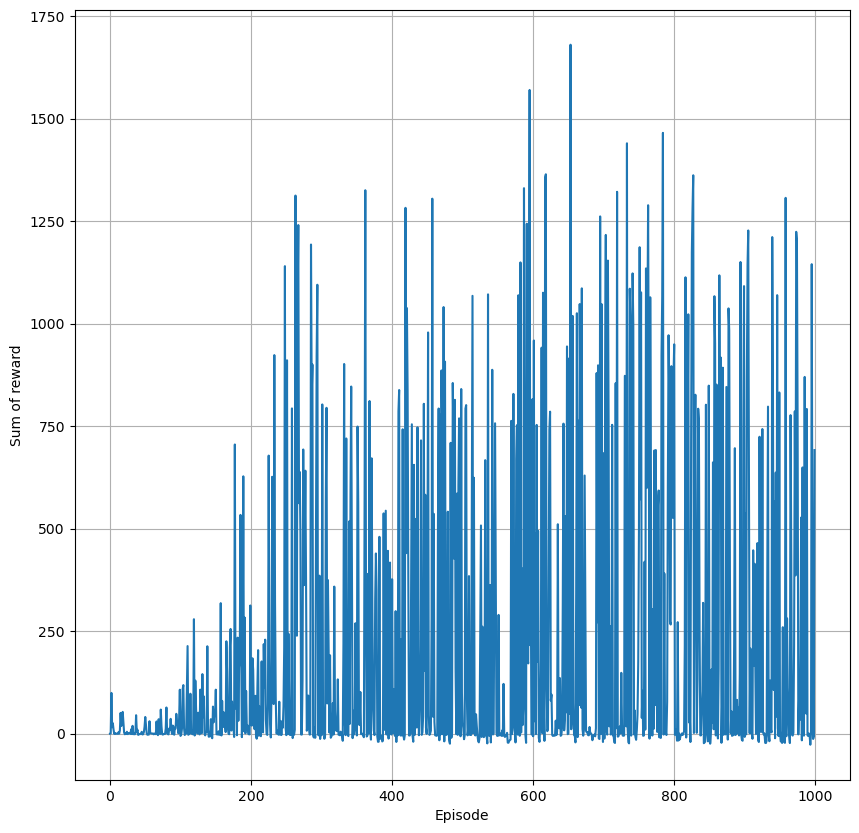

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(episodes, sum_reward_over_episode)
plt.xlabel("Episode")
plt.ylabel("Sum of reward")
plt.grid()
plt.show()

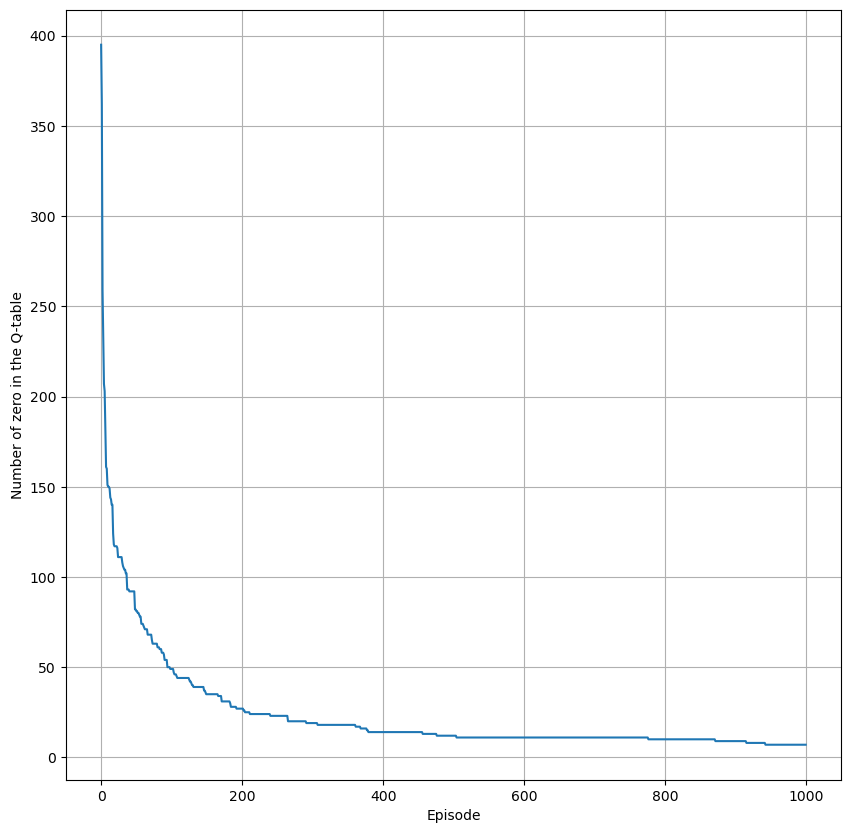

In [4]:
episodes = np.arange(0, nb_episode)
plt.figure(figsize=(10, 10))
plt.plot(episodes, zero_in_q_over_episodes)
plt.xlabel("Episode")
plt.ylabel("Number of zero in the Q-table")
plt.grid()
plt.show()

Concerning its learning speed, we can see that after $1000$ episodes, almost every states has been explored at least once.


In [ ]:
q_learning_power = []
for i in range(nb_day):
    print(i)
    wd = Wind(10, np.random.randint(0, 359), 60, 'OU')
    wt = Wind_turbine(np.random.randint(0, 359), True)
    qlearning = Q_learning_agent(Q)

    # Set up a simulation that runs for 1 day
    qlearning_sm = QLearningSimu(qlearning, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

    # Run the simulations
    qlearning_sm.run_simu()

    # Get the logs from the simulation (random heuristic)
    power_output = qlearning_sm.power_output_log 			    # Power output from the wind turbine in MW
    actions = qlearning_sm.action_log 						    # Actions taken by the agent
    rel_wind = qlearning_sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
    true_rel_wind = qlearning_sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
    wd_heading = qlearning_sm.wd_heading_log
    
    q_learning_power.append(np.mean(power_output))

In [19]:
print("Average power output over 30 days", np.mean(q_learning_power))

Average power output over 30 days 0.3280603141611019


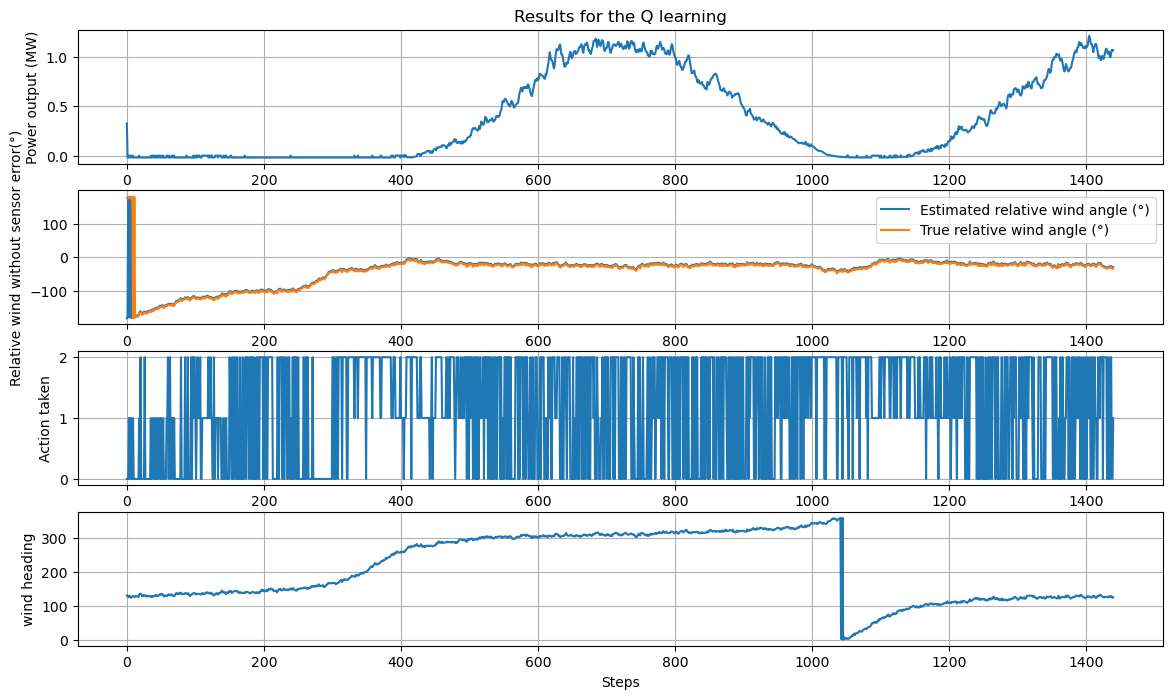

In [15]:
# Plot the result for the last (for the heuristic agent)
ax1 = plt.subplot(411)
ax1.set_title("Results for the Q learning")
ax1.plot(power_output)
ax1.grid()
ax1.set_ylabel('Power output (MW)')

ax2 = plt.subplot(412, sharex=ax1)
ax2.plot(rel_wind, label='Estimated relative wind angle (°)')
ax2.plot(true_rel_wind, label='True relative wind angle (°)')
ax2.grid()
ax2.set_ylabel('Relative wind without sensor error(°)')
ax2.legend()

ax3 = plt.subplot(413, sharex=ax1)
ax3.plot(actions)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('Action taken')

ax3 = plt.subplot(414, sharex=ax1)
ax3.plot(wd_heading)
ax3.grid()
ax3.set_xlabel('Steps')
ax3.set_ylabel('wind heading')

# Resize
fig = plt.gcf()
fig.set_size_inches(14, 8)

plt.show()

We can see in those figures that the relative wind tends to zero and then the turbine tries to follow the wind since the relative wind is close to zero.

To have better results, we should have taken a larger state space (w

<div style="background-color: #e1f5fe; border-left: 5px solid #2962ff; padding: 0.5em;"> 
<b style="color: #2962ff;">Question:</b>  
    <ul>
        <li>  (*) Implement a deep-Q-learning algorithm to solve the same task (Hint: again, choose wisely
your state representation and your neural architecture). </li>
    </ul>
</div>

$\color{red} {\text{TODO}}$

<div style="background-color: #e1f5fe; border-left: 5px solid #2962ff; padding: 0.5em;"> 
<b style="color: #2962ff;">Question:</b>  
    <ul>
        <li> (*) Implement a policy gradient algorithm (Hint: explain your design of a policy, your parametrization and how it learns).
  </li>
    </ul>
</div>

$\color{red} {\text{TODO}}$